In [28]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://ppa

In [29]:
!sudo apt-get install texlive-full  

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aglfn asymptote asymptote-doc biber chktex cm-super cm-super-minimal context
  context-modules dvidvi dvipng emacsen-common feynmf fonts-adf-accanthis
  fonts-adf-berenis fonts-adf-gillius fonts-adf-universalis
  fonts-arphic-bkai00mp fonts-arphic-bsmi00lp fonts-arphic-gbsn00lp
  fonts-arphic-gkai00mp fonts-baekmuk fonts-cabin fonts-comfortaa
  fonts-croscore fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-baskerville
  fonts-gfs-bodoni-classic fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-didot-classic fonts-gfs-gazis fonts-gfs-neohellenic fonts-gfs-olga
  fonts-gfs-porson fonts-gfs-solomos fonts-gfs-theokritos fonts-go
  fonts-hosny-amiri fonts-i

In [20]:
import matplotlib.pyplot as plt 
import pickle
import os
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
from google.colab import files
files.upload()

Saving batches.zip to batches.zip


{'batches.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00c\x96yR\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00 \x00batch01/UT\r\x00\x07\x8b\xcd\\`\x85\x01]`\x8b\xcd\\`ux\x0b\x00\x01\x04\xf5\x01\x00\x00\x04\x14\x00\x00\x00PK\x03\x04\x14\x00\x08\x00\x08\x00c\x96yR\x00\x00\x00\x00\x00\x00\x00\x00\xa3\x05\x00\x00 \x00 \x00batch01/Rf_001_20000_100runs.pklUT\r\x00\x07\x8b\xcd\\`\x8b\xcd\\`\x8b\xcd\\`ux\x0b\x00\x01\x04\xf5\x01\x00\x00\x04\x14\x00\x00\x00-\x92\xd9n\x13A\x10E\x01\x8f{6{\xc6K\xec\xb1\xe3%\x8b\x9dd\x02\xb1\x93\x10\x87M\x80\x04(\x08\xa9~\x81<\xf0\x10\xde\xf3\x07|:\xa7\xeeX\xad\xde\xaao\xdd\xaa\xba]\xffZ\x8f\xcf/\xea\xc7\xe7\x97\xb5E\xd6\xb2\xd8\xda\xac\x81\x99rJdiqj\xd66/>\x83\xf6\xe65eM\x18\x11\xb6\x98\x19\xe9%\xd2\x8c\x85Lem\x89\xb9\xad\xf7\xa0=\x80\t\xb2f\x8a\x90\x08\xdbp${\x8f\xa0(\xcd9\xdd\xe7\xd0\x16s\xf3\xd6\xc4\x8f\xf7YE\xdc\xb2\xa7\xc7\xe7W\xb5u M-g\xf8)\x07\x90i\x0497\x94\x89\x8a\xec`\xebp*@\xf9K\x8bS\xd8{\xe5\xd8\x1d\x93\x83wK\xc2[\xa2\x82:\xfbD\xfaJ\xd6\xd3\xed22Y

In [ ]:
!unzip batches.zip

In [17]:
batches = ['batch01', 'batch02', 'batch03']
Rlist_names = ['R_f01_L10', 'R_f01_L20', 'R_f01_L50', 'R_f01_L80', 'R_f01_L130', 
               'R_f01_L280', 'R_f01_L500', 'R_f005_L10', 'R_f005_L20', 'R_f005_L50', 
               'R_f005_L80', 'R_f005_L130', 'R_f005_L280', 'R_f005_L500','R_f001_L10',
               'R_f001_L20', 'R_f001_L50', 'R_f001_L80', 'R_f001_L130', 'R_f001_L280', 
               'R_f001_L500']

R_f01_L10 =  []
R_f01_L20 =  []
R_f01_L50 =  [] 
R_f01_L80 =  []
R_f01_L130 = []
R_f01_L280 = []
R_f01_L500 = [] 

R_f005_L10 =  []
R_f005_L20 =  []
R_f005_L50 =  []
R_f005_L80 =  []
R_f005_L130 = []
R_f005_L280 = []
R_f005_L500 = [] 

R_f001_L10 =  []
R_f001_L20 =  []
R_f001_L50 =  []
R_f001_L80 =  []
R_f001_L130 = []
R_f001_L280 = []
R_f001_L500 = []

Rlist = [R_f01_L10, R_f01_L20, R_f01_L50, R_f01_L80, R_f01_L130, R_f01_L280, 
         R_f01_L500, R_f005_L10, R_f005_L20, R_f005_L50, R_f005_L80, R_f005_L130, 
         R_f005_L280, R_f005_L500, R_f001_L10, R_f001_L20, R_f001_L50, R_f001_L80, 
         R_f001_L130, R_f001_L280, R_f001_L500]

for i in range(len(batches)):
    for j in range(len(Rlist_names)):
        with open('/content/'+batches[i]+'/'+Rlist_names[j]+'.pkl', 'rb') as f:
            loaded_list = pickle.load(f)
            Rlist[j] += loaded_list
            f.close()

In [14]:
print(len(Rlist[0]), len(Rlist[5]), len(Rlist[10]), len(Rlist[20]))

481 481 481 481


In [21]:
R_f01_mean  = [np.mean(R_f01_L10), 
               np.mean(R_f01_L20), 
               np.mean(R_f01_L50),
               np.mean(R_f01_L80),
               np.mean(R_f01_L130), 
               np.mean(R_f01_L280), 
               np.mean(R_f01_L500)]

R_f005_mean  = [np.mean(R_f005_L10), 
                np.mean(R_f005_L20), 
                np.mean(R_f005_L50),
                np.mean(R_f005_L80),
                np.mean(R_f005_L130), 
                np.mean(R_f005_L280), 
                np.mean(R_f005_L500)]

R_f001_mean  = [np.mean(R_f001_L10), 
                np.mean(R_f001_L20), 
                np.mean(R_f001_L50),
                np.mean(R_f001_L80),
                np.mean(R_f001_L130), 
                np.mean(R_f001_L280), 
                np.mean(R_f001_L500)]

In [25]:
f_val = [0.1, 0.05, 0.01]
L_val = [10, 20, 50, 80, 130, 280, 500]

def TheoreticalScaling(L):
    return np.sqrt(1.5*np.pi*float(L))

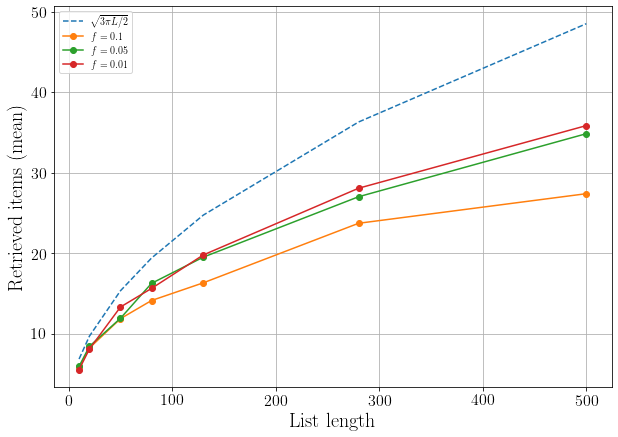

In [32]:
plt.figure(figsize=(10,7))
plt.xlabel("List length", fontsize=20)
plt.ylabel("Retrieved items (mean)", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
rlist = [R_f01_mean, R_f005_mean, R_f001_mean]
plt.plot(L_val, [TheoreticalScaling(val) for val in L_val], '--', label='$\sqrt{3\pi L/2}$')
for r in range(3):
    plt.plot(L_val, rlist[r], 'o-', label='$f = '+str(f_val[r])+'$') 
plt.legend()
plt.savefig('r_vs_l.pdf', bbox_inches='tight')
plt.show()